# 1. Introduction

Someone wise once said: "Death is what gives life meaning." While we certainly will not be going into the philosophical interpretations of death and the meaning of life, we will be looking at global cause-of-death data. Death is a natural part of life but dying prematurely, especially due to unfortunate and unnecessary causes, is something we as individuals and as a society should seek to avoid. An important first-step in decreasing death tolls is examining the causes of death that affect humans on a global scale. The dataset I chose to use for this project aims to assist in the effort of analyzing causes of death on a global scale.

I found this dataset on Kaggle. This dataset was originally created by contributors at [Our World in Data](https://ourworldindata.org/). *Our World in Data* is a scientific online publication that focuses on large-scale global issues such as poverty, disease, climate change, hunger, war, and more. *Our World in Data* is produced as a collaborative effort between researchers at the University of Oxford, who are the scientific contributors of the available content on the website; and the non-profit organization *Global Change Data Lab*, who owns, publishes, and maintains the website and the data tools.

This dataset is interesting because while it contains a lot of important information, there is not one clearly defined dependent, or target, variable. Hence, full discretion is given to the user(s) of this dataset while exploring the limitations of the given data and performing analysis. Listed below are the three research questions that popped in my mind when I explored this dataset:

**Question 1:** Has the number of total deaths from all of these causes of death been trending upward, downward, or remained relatively constant over the years in China and India?

**Question 2:** How well can we categorize a country with respect to their global economic status (developed/developing, lower/middle/high income nations) using death tolls from all of these causes of death? Which causes of death are the best predictors in categorizing a particular country?

**Question 3:** Can we properly cluster each country with their respective continent using data from deaths caused by environment-related causes of death?

---

# 2. Analysis

## Loading in Main Dataset & Necessary Packages and Initial Data Cleanup

In [1]:
data <- read.csv("https://raw.githubusercontent.com/rickyzoo/Cause-of-Death-Analysis-in-R/main/cause_of_deaths.csv")

head(data, 3)

,Country.Territory,Code,Year,Meningitis,Alzheimer.s.Disease.and.Other.Dementias,Parkinson.s.Disease,Nutritional.Deficiencies,Malaria,Drowning,Interpersonal.Violence,⋯,Diabetes.Mellitus,Chronic.Kidney.Disease,Poisonings,Protein.Energy.Malnutrition,Road.Injuries,Chronic.Respiratory.Diseases,Cirrhosis.and.Other.Chronic.Liver.Diseases,Digestive.Diseases,Fire..Heat..and.Hot.Substances,Acute.Hepatitis
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,⋯,2108,3709,338,2054,4154,5945,2673,5005,323,2985
2,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,⋯,2120,3724,351,2119,4472,6050,2728,5120,332,3092
3,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,⋯,2153,3776,386,2404,5106,6223,2830,5335,360,3325


In [2]:
# install.packages('reshape2')
# install.packages('ranger')
# install.packages('class')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(dplyr)
library(ggplot2)
library(reshape2)
library(ranger)
library(class)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
# Getting rid of the redundant 'Code' column

data <- data %>% select(-Code)

In [5]:
colnames(data)

[1] "Country.Territory"                         
 [2] "Year"                                      
 [3] "Meningitis"                                
 [4] "Alzheimer.s.Disease.and.Other.Dementias"   
 [5] "Parkinson.s.Disease"                       
 [6] "Nutritional.Deficiencies"                  
 [7] "Malaria"                                   
 [8] "Drowning"                                  
 [9] "Interpersonal.Violence"                    
[10] "Maternal.Disorders"                        
[11] "HIV.AIDS"                                  
[12] "Drug.Use.Disorders"                        
[13] "Tuberculosis"                              
[14] "Cardiovascular.Diseases"                   
[15] "Lower.Respiratory.Infections"              
[16] "Neonatal.Disorders"                        
[17] "Alcohol.Use.Disorders"                     
[18] "Self.harm"                                 
[19] "Exposure.to.Forces.of.Nature"              
[20] "Diarrheal.Diseases"                        
[21] "Environmental.Heat.and.Cold.Exposure"      
[22] "Neoplasms"                                 
[23] "Conflict.and.Terrorism"                    
[24] "Diabetes.Mellitus"                         
[25] "Chronic.Kidney.Disease"                    
[26] "Poisonings"                                
[27] "Protein.Energy.Malnutrition"               
[28] "Road.Injuries"                             
[29] "Chronic.Respiratory.Diseases"              
[30] "Cirrhosis.and.Other.Chronic.Liver.Diseases"
[31] "Digestive.Diseases"                        
[32] "Fire..Heat..and.Hot.Substances"            
[33] "Acute.Hepatitis"

In [6]:
# Renaming columns because I'm OCD about '.' in column names

data <- data %>%
  rename(
    Country = Country.Territory, Year = Year, Meningitis = Meningitis, Alzheimers_and_other_Dementias = Alzheimer.s.Disease.and.Other.Dementias,
    Parkinsons_Disease = Parkinson.s.Disease, Nutritional_Deficiencies = Nutritional.Deficiencies, Malaria = Malaria, Drowning = Drowning,
    Interpersonal_violence = Interpersonal.Violence, Maternal_disorders = Maternal.Disorders, HIV_AIDS = HIV.AIDS, Drug_Use_disorders = Drug.Use.Disorders,
    Tuberculosis = Tuberculosis, Cardiovascular_diseases = Cardiovascular.Diseases, Lower_Respiratory_Infections = Lower.Respiratory.Infections,
    Neonatal_disorders = Neonatal.Disorders, Alcohol_Use_disorders = Alcohol.Use.Disorders, Selfharm = Self.harm, Exposure_to_Forces_of_Nature = Exposure.to.Forces.of.Nature,
    Diarrheal_diseases = Diarrheal.Diseases, Environmental_Heat_and_Cold_Exposure = Environmental.Heat.and.Cold.Exposure, Neoplasms = Neoplasms,
    Conflict_and_Terrorism = Conflict.and.Terrorism, Diabetes = Diabetes.Mellitus, Chronic_Kidney_disease = Chronic.Kidney.Disease, Poisonings = Poisonings,
    Protein_Energy_Malnutrition = Protein.Energy.Malnutrition, Road_Injuries = Road.Injuries, Chronic_Respiratory_diseases = Chronic.Respiratory.Diseases,
    Cirrhosis_and_other_Chronic_Liver_Diseases = Cirrhosis.and.Other.Chronic.Liver.Diseases, Digestive_diseases = Digestive.Diseases,
    Fire_Heat_and_Hot_substances = Fire..Heat..and.Hot.Substances, Acute_Hepatitis = Acute.Hepatitis
    )

In [7]:
# Adding a column containing the total number of deaths caused by each cause-of-death for each country in each year

data <- data %>% mutate(Total_no_of_Deaths = rowSums(. [3:33]))

In [8]:
head(data, 3)

,Country,Year,Meningitis,Alzheimers_and_other_Dementias,Parkinsons_Disease,Nutritional_Deficiencies,Malaria,Drowning,Interpersonal_violence,Maternal_disorders,⋯,Chronic_Kidney_disease,Poisonings,Protein_Energy_Malnutrition,Road_Injuries,Chronic_Respiratory_diseases,Cirrhosis_and_other_Chronic_Liver_Diseases,Digestive_diseases,Fire_Heat_and_Hot_substances,Acute_Hepatitis,Total_no_of_Deaths
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,Afghanistan,1990,2159,1116,371,2087,93,1370,1538,2655,⋯,3709,338,2054,4154,5945,2673,5005,323,2985,147971
2,Afghanistan,1991,2218,1136,374,2153,189,1391,2001,2885,⋯,3724,351,2119,4472,6050,2728,5120,332,3092,156844
3,Afghanistan,1992,2475,1162,378,2441,239,1514,2299,3315,⋯,3776,386,2404,5106,6223,2830,5335,360,3325,169156


---

## Research Question 1: 
Has the number of total deaths from all of these causes of death been trending upward, downward, or remained relatively constant over the years in China and India?

### Method: **Data Manipulation and Visualization**

#### **China**

In [9]:
# Creating a data subset for China with the data we want

China_Total_no_of_Deaths <- data %>% filter(Country == 'China') %>% select(Year, Total_no_of_Deaths) %>% arrange(Year)

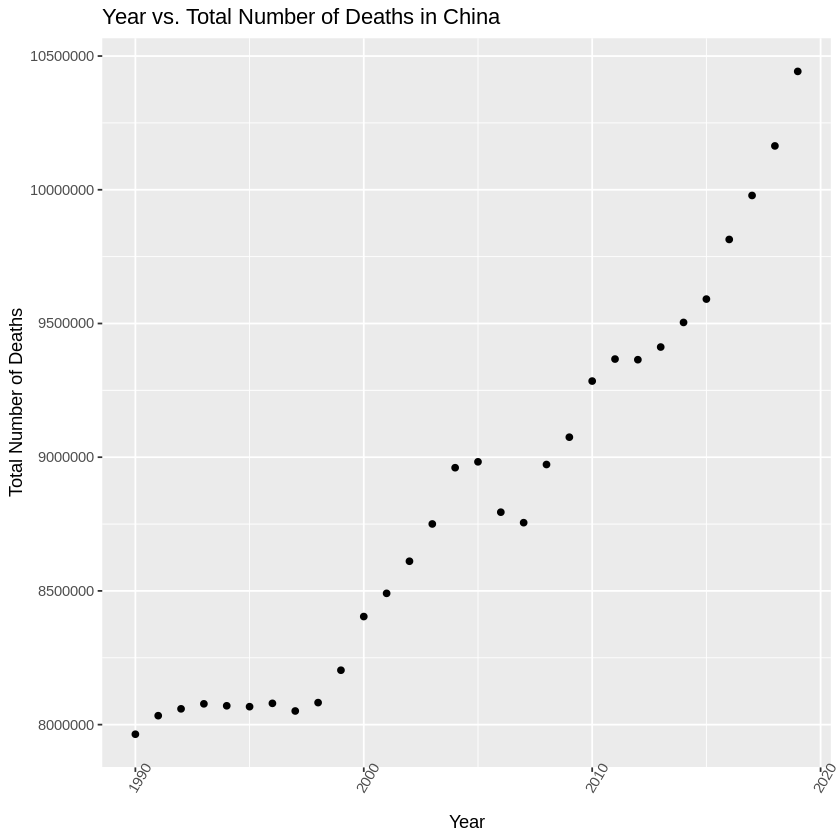

In [10]:
# Plotting

ggplot(data = China_Total_no_of_Deaths) +
    geom_point(aes(x = Year, y = Total_no_of_Deaths)) +
    xlab('Year') + ylab('Total Number of Deaths') +
    ggtitle('Year vs. Total Number of Deaths in China') +
    theme(axis.text.x = element_text(angle = 60))

#### **India**

In [11]:
India_Total_no_of_Deaths <- data %>% filter(Country == 'India') %>% select(Year, Total_no_of_Deaths) %>% arrange(Year)

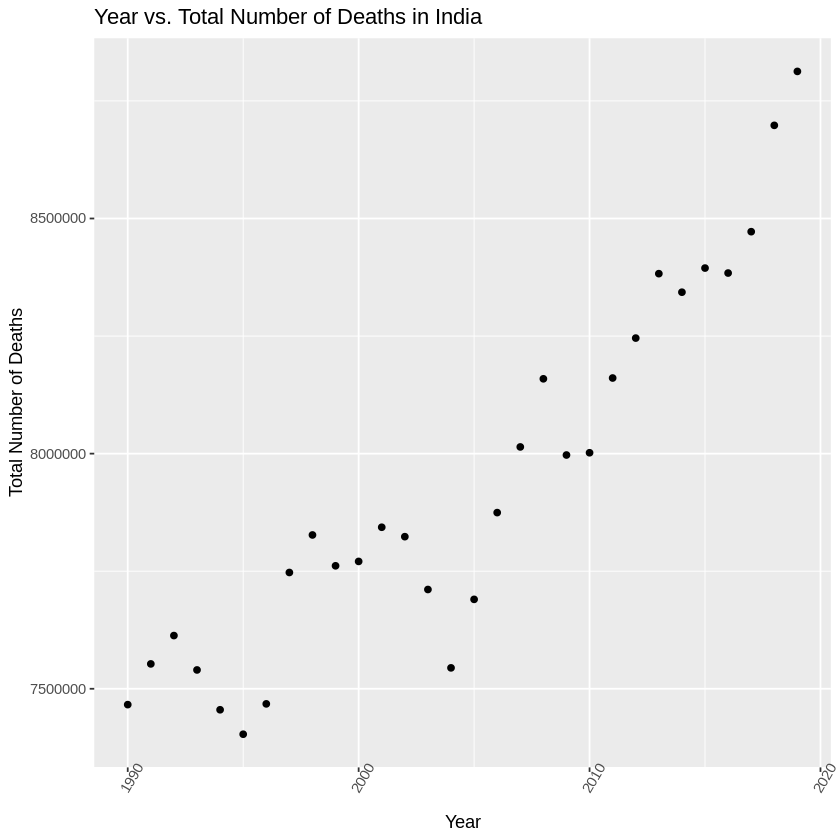

In [12]:
ggplot(data = India_Total_no_of_Deaths) +
    geom_point(aes(x = Year, y = Total_no_of_Deaths)) +
    xlab('Year') + ylab('Total Number of Deaths') +
    ggtitle('Year vs. Total Number of Deaths in India') +
    theme(axis.text.x = element_text(angle = 60))

#### Notes:

We can see from the two scatterplots above that the total number of deaths in China and India from all of the given causes of death in this dataset have been trending upward between 1990 - 2019. Although we see slight dips in the total death counts, especially in India, there exists a general positive slope in both scatterplots. Keep in mind that this dataset does not provide the exact count of a nation's death count.

Technological innovation and access to more resources greatly improves data collection. This can definitely be one of the reasons why we see an almost-linear positive slope in the number of total reported deaths from the given causes of death. Additionally, each country's population, as with most countries over the decades, have steadily increased. This certainly plays a role in the general upward trend in the total reported death counts over the years. Let's now take a look at the top 3 causes of death that took the most number of lives in China and India in this 30-year period to see if the death toll from those causes have been trending upward, downward, or remained constant.

In [13]:
# Calculating the total number of deaths from each cause-of-death over the 30 year period

## Filtering the data we want

China_Deaths <- data %>% filter(Country == 'China') %>% select(-Total_no_of_Deaths) %>% arrange(Year)
India_Deaths <- data %>% filter(Country == 'India') %>% select(-Total_no_of_Deaths) %>% arrange(Year)

## Performing calculations

China_sum_of_each_death <- colSums(Filter(is.numeric, China_Deaths))
India_sum_of_each_death <- colSums(Filter(is.numeric, India_Deaths))

In [14]:
# Returning the top 5 causes in China

head(sort(China_sum_of_each_death, decreasing=TRUE), 5)

Cardiovascular_diseases                    Neoplasms 
                   100505973                     61060527 
Chronic_Respiratory_diseases           Digestive_diseases 
                    36676826                      8924906 
Lower_Respiratory_Infections 
                     8525819

In [15]:
# Returning the top 5 causes in India

head(sort(India_sum_of_each_death, decreasing=TRUE), 5)

Cardiovascular_diseases           Diarrheal_diseases 
                    52994710                     26243547 
Chronic_Respiratory_diseases           Neonatal_disorders 
                    25232974                     20911570 
                   Neoplasms 
                    17762703

#### Notes:

We can see that Cardiovascular diseases rank number 1 in terms of claiming the most lives in both China and India. Chronic respiratory diseases rank the third highest for both countries, with Neoplasms (cancer-related diseases) ranking second in China and Diarrheal diseases ranking second in India. 

We will visualize the change in death counts at the hands of each of these causes of death for both countries over the 30 year period. In order to get a fuller picture of the relationship between the top 3 causes of death and the total death count, we will normalize the death counts of each cause of death by the total death count, respective of each year. 

In [16]:
# Normalizing all data by total death count

norm_data <- data %>% mutate(across(c(3:33), .fns = ~./Total_no_of_Deaths))

In [17]:
# Filtering the data we want and transforming them so they we can plot with ease

## Filtering

China_Top3_Deaths <- norm_data %>% filter(Country == 'China') %>% select(Year, Cardiovascular_diseases, Neoplasms, Chronic_Respiratory_diseases) %>% arrange(Year)
India_Top3_Deaths <- norm_data %>% filter(Country == 'India') %>% select(Year, Cardiovascular_diseases, Diarrheal_diseases, Chronic_Respiratory_diseases) %>% arrange(Year)

## Transforming the structure of our dataframes using the 'melt()' function from 'reshape2'

China_Top3_Deaths <- melt(China_Top3_Deaths, id.vars='Year', variable.name='Cause_of_Death')
India_Top3_Deaths <- melt(India_Top3_Deaths, id.vars='Year', variable.name='Cause_of_Death')

#### **China**

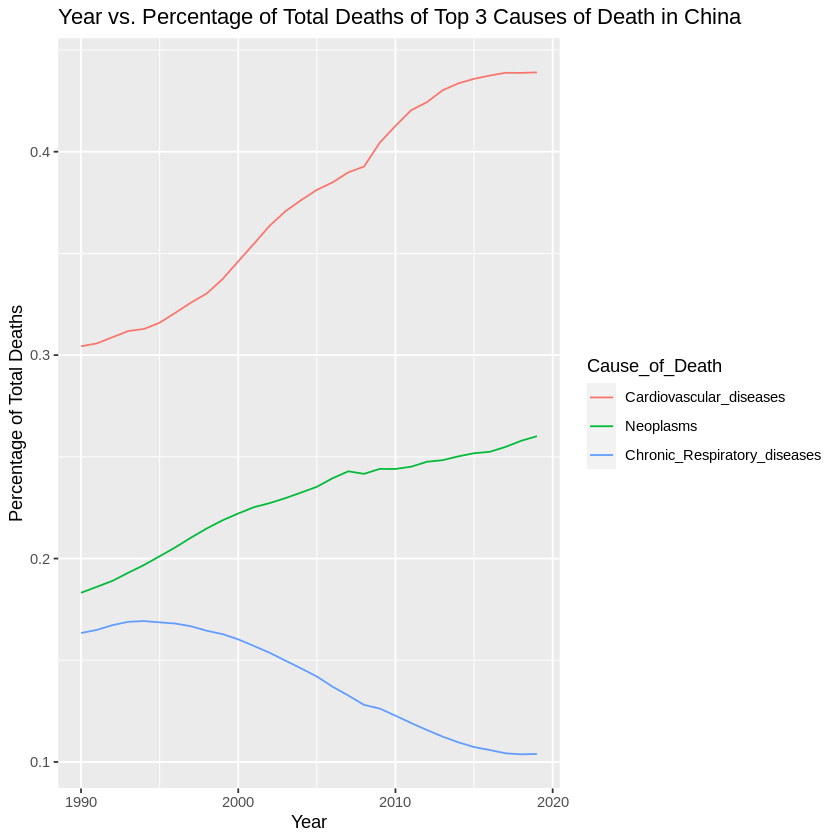

In [18]:
ggplot(China_Top3_Deaths, aes(Year, value)) +
  geom_line(aes(color=Cause_of_Death)) +
  xlab('Year') + ylab('Percentage of Total Deaths') +
  ggtitle('Year vs. Percentage of Total Deaths of Top 3 Causes of Death in China')

We can see that the number of deaths caused by cardiovascular diseases and neoplasms over the last 30 years fall in line with the general trend of the total death counts in China over the last 30 years. The number of lives lost at the hands of chronic respiratory diseases seem to have consistently decreased each year from the mid 1990's to the mid 2010's however, indicating that the lives lost at the hands of other causes of death notably increased for the total death count to still trend upward over the years. The general Chinese population intakes some of the highest amounts of tobacco in the world on an annual basis. As a result, they had major respiratory related medical issues that needed to be taken seriously. Increased awareness and access to better healthcare has certainly contributed to the decreased number of reported deaths at the hands of respiratory diseases.

#### **India**

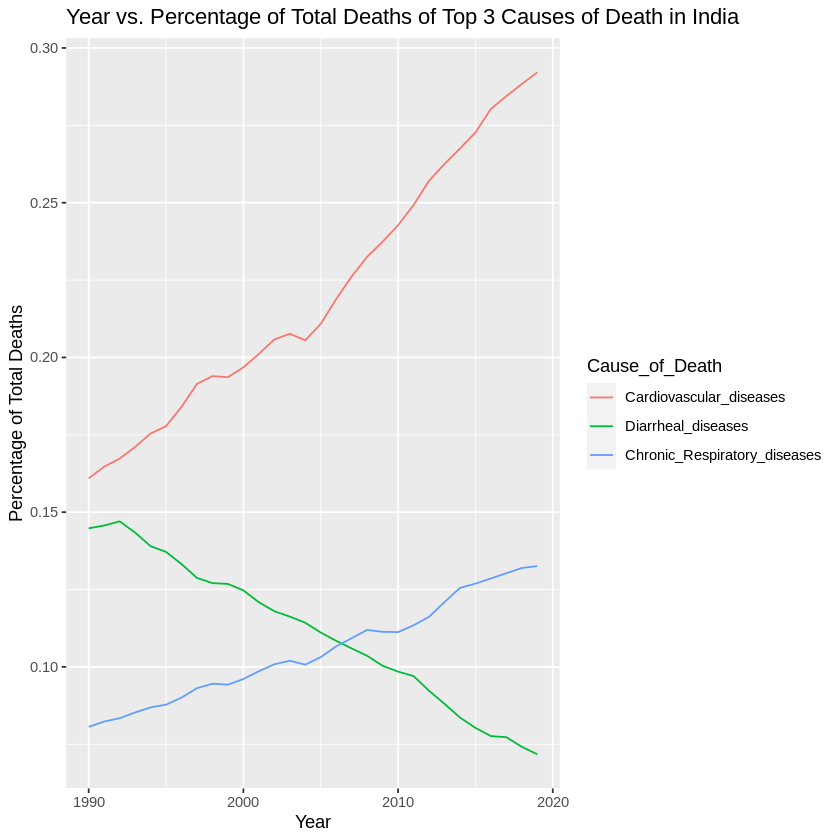

In [19]:
ggplot(India_Top3_Deaths, aes(Year, value)) +
  geom_line(aes(color=Cause_of_Death)) +
  xlab('Year') + ylab('Percentage of Total Deaths') +
  ggtitle('Year vs. Percentage of Total Deaths of Top 3 Causes of Death in India')

Similarly, we can see that the number of deaths caused by cardiovascular diseases over the last 30 years fall in line with the general trend of the total death counts in India over the last 30 years. Unlike China, however, the number of lives lost at the hands of chronic respiratory diseases follows a general positive slop. We can also see that the number of lives lost at the hands of diarrheal diseases seem to have consistently decreased each year from the mid 1990's to 2019. This falls in line with information provided by [Indiaspend.com](https://www.indiaspend.com/indias-child-deaths-from-diarrhoea-down-52-in-decade-but-pakistan-bangladesh-do-better-on-solutions-82548/#:~:text=This%20reduction%20in%20deaths%2C%20as,the%20Lancet%20study%20quoted%20above.) indicating that India started to provide programs to immunize and control diarrheal diseases among children. This has had a tremendous positive impact on decreasing the death toll caused by diarrheal diseases, especially for India's younger, more vulnerable, citizens. 

---

## Research Question 2: 
How well can we categorize a country with respect to their global economic status (lower/middle/high income nations) using cause-of-death data?

### Method: **Random Forest Classification**

In [20]:
length(unique(data$Country))

[1] 204

#### Notes:

There are 204 unique countries within this dataset. In order to properly classify a country as low, middle, or high income in each of the last 30 years, we need to gather relevant data for each country's GDP per capita for each of the last 30 years. I was able to find the necessary data from [data.worldbank.org]('https://data.worldbank.org/indicator/NY.GDP.PCAP.CD'). It contains each nation's GDP per capita for the last few decades in terms of, in their words, 'current US$'. 

According to [opened.cuny.edu]('https://opened.cuny.edu/courseware/lesson/585/student/#:~:text=GDP%20per%20capita%20also%20allows,per%20year%20per%20capita%20income.') low-income countries are those with an annual per capita GDP of at most 1,025USD; middle-income countries have a per capita GDP between 1,025 and 12,475USD; while high-income countries have over 12,475USD per year per capita income. We will be using these ranges to categorize each country for each year between 1990 and 2019 to perform our analysis.

With some assistance from Professor Hallenbeck, I was able to create a csv file with a transformed version of the GDP data whose structure is compatible with our main dataset.

In [21]:
# Loading GDP data and renaming columns for compatibility

gdp_percap_data <- read.csv('https://raw.githubusercontent.com/rickyzoo/Cause-of-Death-Analysis-in-R/main/income.csv')

gdp_percap_data <- gdp_percap_data %>% rename(
  Country = Country.Name,
  GDP_Percap = value,
  Year = year,
  Income_level = income_level)

In [22]:
# Merging our datasets into one

combined_df <- merge(norm_data, gdp_percap_data, by=c('Country','Year'))

In [23]:
# head(combined_df, 3)

In [24]:
# Changing the datatype of the values in our target column so it is compatible with the Random Forest classification algorithm

combined_df$Income_level <- as.factor(combined_df$Income_level)

#### Performing Random Forest Classification

In [25]:
# Creating new dataframe with all columns except 'Country', 'Year', 'Total_no_of_deaths' and 'GDP_Percap (because we aren't concerned with these factors in our analysis)

main_analysis <- combined_df %>% select(-Country, -Year, -Total_no_of_Deaths, -GDP_Percap)

In [26]:
# Splitting dataset

set.seed(8675309)

split <- 0.75
rows <- nrow(main_analysis)

train.entries <- sample(rows, rows*split)

main.train <- main_analysis[train.entries, ]
main.valid <- main_analysis[-train.entries, ]

In [27]:
# Fitting model

forest <- ranger(Income_level ~ ., data=main.train, importance='impurity')

In [28]:
# Preparing for model evaluation

main.train <- main.train %>%
    mutate(yhat = predict(forest, type='response', data=main.train)$predictions)

main.valid <- main.valid %>%
    mutate(yhat = predict(forest, type='response', data=main.valid)$predictions)

In [29]:
# Getting null accuracy to contextualize model accuracy on validation dataset. (It is the greatest value among the three)

main.valid %>% group_by(Income_level) %>% summarize(null.acc = n()/nrow(.)) %>% pull()

[1] 0.2513922 0.2577566 0.4908512

In [30]:
# Getting model accuracy on testing data

main.valid %>% summarize(sum(yhat == Income_level)/nrow(.)) %>% pull()

[1] 0.9626094

In [40]:
# Calculating and sorting/visualizing importance score of each feature variable

importance <- data.frame(importance(forest))

sorted_importance <- arrange(importance, desc(importance.forest.))
sorted_importance

,importance.forest.
,<dbl>
Neoplasms,259.28953
Parkinsons_Disease,195.59276
Alzheimers_and_other_Dementias,172.73900
Diarrheal_diseases,143.04497
Neonatal_disorders,132.56163
Maternal_disorders,100.95594
Meningitis,99.05584
Diabetes,88.49653
Tuberculosis,87.76916


#### **Discussion:**
Random Forest classification is a powerful tool for data analysis. It allows us to evaluate predictiveness of feature variables, perform feature selection, and calculate other meaningful statistics within a dataset. In our analysis, we examined how accurate we could be in classifying the Economic status of a country based solely off of our normalized cause-of-death data. 

In order to contextualize our accuracy score, we first calculated the null accuracy score, which is the accuracy of the model if it were to predict the majority class label found in the training dataset when making predictions on the validation dataset. As we can see, we have a null accuracy score of around 49%, while we have a validation accuracy score of about 96.2%. This tells us that our model did quite a nice job at classifying the Economic status of each observation in the validation dataset.

We also found the importance score for each feature. These importance scores can be used to assess the relative importance of each feature in predicting the target variable. Higher importance scores indicate that a feature is more important for predicting the target variable, while lower importance scores indicate that a feature is less importance. We can see that the top 5 ranked features based on importance score are Neoplasms (cancer-related diseases), Parkinsons disease, Alzherimers and other Dementias, Diarrheal diseases, and Neonatal disorders.

---

## Research Question 3: 
Can we properly cluster each country with their respective continent using data from deaths caused by environment-related causes of death?

### Method: **K-Nearest-Neighbors Classification**

In [41]:
# Loading in data that categorizes a country with their respective continent (found on Github)

continents <- read.csv('https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv')

In [42]:
# Merging 'continents' data with our normalized data

data_with_continent <- merge(norm_data, continents, by='Country')

In [45]:
print(nrow(norm_data))
print(nrow(data_with_continent))

[1] 6120
[1] 5400


Notice that the number of rows in our original dataframe is greater than the number of rows in our merged dataset. This is because the content in each respective datasets' 'Country' column is slightly different, and `merge()` takes the intersection of the given dataframes.

In [46]:
# Listing the unique values in the 'Continent' column

unique(data_with_continent$Continent)

[1] "Asia"          "Europe"        "Africa"        "North America"
[5] "South America" "Oceania"

In [47]:
# Filtering for Environment-related causes of death and turning the values in 'Continent' to factors for compatibility

env_cause_data <- data_with_continent %>% select(Continent, Malaria, Exposure_to_Forces_of_Nature, Environmental_Heat_and_Cold_Exposure,
                    Road_Injuries, Conflict_and_Terrorism, Fire_Heat_and_Hot_substances)

env_cause_data$Continent <- as.factor(env_cause_data$Continent)

#### Performing KNN Classification

In [48]:
# Initial data split

set.seed(8675309)

split1 <- 0.75
rows1 <- nrow(env_cause_data)

train.entries1 <- sample(rows1, rows1*split1)

main.train1 <- env_cause_data[train.entries1, ]
main.valid1 <- env_cause_data[-train.entries1, ]

In [49]:
# Further data split for model compatibility

class_label_train <- main.train1$Continent
features_train <- main.train1[, 2:7]

class_label_valid <- main.valid1$Continent
features_valid <- main.valid1[, 2:7]

In [50]:
# Fitting the model

knn_model <- knn(features_train, features_valid, class_label_train, k=6)

In [51]:
# Finding model accuracy

misclasserr <- mean(knn_model != main.valid1$Continent)

print(paste('Accuracy: ', 1-misclasserr))

[1] "Accuracy:  0.777777777777778"


In [52]:
# Confusion matrix

table(main.valid1$Continent, knn_model)

               knn_model
                Africa Asia Europe North America Oceania South America
  Africa           329   25      0             6       4            10
  Asia              21  218     36            29       6             7
  Europe             3    8    292            15      10             1
  North America      7   11      7           103       8            16
  Oceania            7    3     20             7      64             1
  South America      8    4      1            11       8            44

#### **Discussion:**
We used cause-of-death data from certain environment-related causes of death to see how well we can classify an observation to their respective continent. We have a model accuracy of about 77.78%, which is not bad considering the fact that we have 6 different classes. 

From looking at the confusion matrix, we can note a few things:
- The model assumes some similarities between Africa and Asia
- The model picked up on some similarities between Europe and Asia, and North America and Asia
- The model sees some similarities between North America and South America

From these results, we can deduce that there is some correlation between the proportion of deaths caused by environment-related factors and the region you are in. 

---

# 3. Conclusion

In my analysis, we were able to visualize the general trend in total reported death counts in China and India over the 30-year period, evaluate how well we can predict a country's economic status using cause-of-death data, and how well we can categorize a country with their respective continent using environment-related causes of death. 

We saw that the total counts of reported deaths in China and India both saw a general positive and linear slope, and that 2 of the top 3 causes of death followed a similar trend. In China, the proportion of citizens dying from Chronic respiratory diseases consistently fell over the 30 years, while the proportion of citizens dying from Diarrheal diseases consistently fell over the 30 years in India. These realities can be attributed to increased awareness and improved/increased access to resources. For the purposes of what I was trying to find, I believe my analysis was satisfactory, however, there is certainly much more to build upon when it comes to time series analysis.

We saw that the Random Forest classification algorithm was quite good at classifying the economic status of a record of data using the normalized cause-of-death data. There are certainly ways to tune and optimize the model. Additionally, it would be nice to see how accurate our predictions would be if we used only the top 5 or top 10 features based off their importance scores.

Finally, we were able to deduce that there may exist some correlation with regards to the proportion of deaths caused by environment-related factors and the continent you are in. We had a KNN classification model accuracy of roughly 77.78% when trying to classify a record of data with their respective continent. Similarly to the Random Forest analysis, we could have tuned and optimized the model in different ways. 

All in all, this was an interesting project on examining cause-of-death data on a global scale.

---

# 4. References

**Data:**
- https://www.kaggle.com/datasets/iamsouravbanerjee/cause-of-deaths-around-the-world
- https://ourworldindata.org/causes-of-death
- https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
- https://github.com/dbouquin/IS_608/blob/master/NanosatDB_munging/Countries-Continents.csv

**Other information:**
- https://www.a4id.org/policy/understanding-the-developeddeveloping-country-taxonomy/
- https://opened.cuny.edu/courseware/lesson/585/student/#:~:text=GDP%20per%20capita%20also%20allows,per%20year%20per%20capita%20income.
- https://www.indiaspend.com/indias-child-deaths-from-diarrhoea-down-52-in-decade-but-pakistan-bangladesh-do-better-on-solutions-82548/#:~:text=This%20reduction%20in%20deaths%2C%20as,the%20Lancet%20study%20quoted%20above.

